In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import *
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
sns.set()
%matplotlib inline

In [2]:
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, no_bias=True, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.losses = np.array([]) #np.array([])でもok
        self.losses_val = np.array([])
        self.theta = None #スタート、ゴールになるものをinitに入れる　NoneでもOK
        
    # 問題6（学習と推定）
    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        """
        # self.n_samples = X.shape[0]
        # n_features = X.shape[1]

        self.theta = np.ones((X.shape[1]+1, 1)) # 1の配列でthetaを作成。shape(X.shape[1]+1, 1)
        one_array = np.ones((X.shape[0], 1)) # bias項サンプル数分作成
        one_X = np.concatenate([one_array, X], axis=1) # Xとbias項を結合
        
        #f X_val is not None:
        one_array = np.ones((X_val.shape[0], 1)) # bias項サンプル数分作成
        one_X_val = np.concatenate([one_array, X_val], axis=1) # Xとbias項を結合

        for i in range(self.iter):
            # 問題1（仮定関数の計算）
            prediction = one_X @ self.theta


            # 問題2（最急降下法によるパラメータの更新値計算）
            error = prediction - y # yはy_train
            self.theta = self.theta - (self.lr / X.shape[0]) * (error.T @ one_X).T
            
            # 損失計算と記録
            prediction = one_X @ self.theta
            loss = self.loss_func(y,prediction)
            self.losses = np.append(self.losses, loss)
            if X_val is not None:
                prediction_val = one_X_val @ self.theta
                loss_val = self.loss_func(y_val,prediction_val)
                self.losses_val = np.append(self.losses_val, loss_val)

            

    # 問題1
    def _linear_hypothesis(self, X):  # 必要に応じて引数を追加して下さい
        """
        線形の仮定関数を計算する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
          訓練データ
        self.coef_ : theta(coefficient) 次の形のndarray, shape (n_features,)
          パラメータ
        Returns
        -------
          次の形のndarray, shape (n_samples, 1)
          線形の仮定関数による推定結果
        """
        # X.shape(n_samples, n_features) shape[0]で行数取得,shape[1]で列数取得
        self.n_samples = X.shape[0]  #i
        n_features = X.shape[1]      #j
        # Xの(n_samples, 1) のshapeの1のみの行列を作る
        one_array = np.ones((n_samples, 1)) #bias 1
        # Xの一列目にone_arrayを結合 
        self.one_X = np.concatenate([one_array, X], axis=1)#[one_array, X]は　bias + ｘ
        # one_Xの特徴量数の1のみの行列を作る(n_features+1, 1) shape[1]で列数取得
        prediction = one_X @ self.theta #predictionはy_hat
        
        return prediction


    # 問題2
    def _gradient_descent(self, X, y):
        # _gradient_descent(self, X, y_hat, y_true, alpha= , one_X, n_samples):
        """
        最急降下法によるパラメータの更新値計算
        Parameters
        ----------
        α: 学習率
        i : サンプルのインデックス
        j : 特徴量のインデックス
        lr : alfa アルファ　学習率(learning rate)
        self.coef_ : theta(coefficient) 次の形のndarray, shape (n_features,)
        Returns
        -------
        theta
        """
        # y_hatは　_linear_hypothesisのreturnを予定　
        # y_trueはどこかの正解値
        error = self.prediction - y
        # one_Xは　Xの1列目に1のみの列を結合させてある
        self.theta = self.theta - (self.lr / self.n_samples) * (error.T @ self.one_X).T

    # 問題3
    def predict(self, X):
        """
        線形回帰での推定
        """
        # パラメータを決定した後、そのパラメータを用いて、予測結果を出力しなければなりません。これを推定と言います。
        one_array = np.ones((X.shape[0], 1))
        one_X = np.concatenate([one_array, X], axis=1)
        prediction = one_X @ self.theta

        return prediction

    # 問題4
    def _mse(self, y,prediction):
        """
        平均二乗誤差の計算
        """
        mse = ((prediction - y)**2).mean(axis=0)
        return mse

    # 問題5
    def loss_func(self,y,prediction):
        """
        損失関数
        """
        mse = self._mse(y,prediction)
        loss = mse / 2
        return loss

## 【問題1】仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。

$h_θ(x)=θ_0x_0+θ_1x_1+...+θ_jx_j+...+θ_nx_n.(x_0=1)$

x
 : 特徴量ベクトル


θ
 : パラメータベクトル


n
 : 特徴量の数


x
j
 : j番目の特徴量


θ
j
 : j番目のパラメータ（重み）


特徴量の数
n
は任意の値に対応できる実装にしてください。


なお、ベクトル形式で表すと以下のようになります。

$h_θ(x)=θ^T⋅x$

クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。

## 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

$θ_j=θ_j−α\frac{1}{m} \sum_{i=1}^{m}[(h_θ(x^i)−y^i)x^i_j] \quad$

$\alpha$ : 学習率

$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


雛形


ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。

#!
[image.png](attachment:image.png)

## 【問題3】推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。


仮定関数 
$hθ(x)$
 の出力が推定結果です。

## 【問題4】平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。


平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、別の関数として作成してください。雛形を用意してあります。


平均二乗誤差は以下の数式で表されます。

$L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^{2}$


m
 : 入力されるデータの数

$
h
_
θ
(
)
$
 : 仮定関数

$
x
(
i
)
$
 : i番目のサンプルの特徴量ベクトル

$
y
(
i
)
$
 : i番目のサンプルの正解値


なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）


雛形


def MSE(y_pred, y):  
    """
    平均二乗誤差の計算  
    Parameters  
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)  
      推定した値  
    y : 次の形のndarray, shape (n_samples,)  
      正解値  
    Returns  
    ----------  
    mse : numpy.float  
      平均二乗誤差  
    """  
    pass  
    return mse

## 【問題5】目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


目的関数（損失関数） $J(θ)$  は次の式です。

$J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$


m
 : 入力されるデータの数

$
h
_
θ
(
)
$
 : 仮定関数

$
x
(
i
)
$
 : i番目のサンプルの特徴量ベクトル

$
y
(
i
)
$
 : i番目のサンプルの正解値

## 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [3]:
#データセットの準備
df = pd.read_csv("train.csv")
df = pd.DataFrame(df)
X = np.array(df[['YearBuilt']])
y = np.array(df[["SalePrice"]])
#y = y.reshape(-1)  下でyをravel関数使わない場合、ここでreshapeする。　ravel関数を適用させると、一次元のリストが返却
print("X:", X.shape, "y:", y.shape)

X: (1460, 1) y: (1460, 1)


In [4]:
# トレーニングセットと検証セットに分割
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0) # ravel関数を適用させると、一次元のリストが返却
print(f"Xの訓練値:{X_train.shape}  Yの訓練値:{y_train.shape}  Xの正解値:{X_test.shape}  Yの正解値:{y_test.shape}")

Xの訓練値:(1168, 1)  Yの訓練値:(1168, 1)  Xの正解値:(292, 1)  Yの正解値:(292, 1)


In [5]:
# 前処理
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [6]:
print(X_train_std)
print(X_test_std)

[[ 1.18803167]
 [-0.29250097]
 [-1.64143071]
 ...
 [ 0.23391064]
 [ 1.05642877]
 [ 0.89192514]]
[[-0.4570046 ]
 [-0.9834162 ]
 [-0.68730967]
 [ 0.20100991]
 [ 0.00360556]
 [-2.00333868]
 [ 1.18803167]
 [-1.1150191 ]
 [ 0.82612369]
 [ 1.08932949]
 [ 1.15513094]
 [ 0.16810919]
 [ 0.92482587]
 [-0.12799734]
 [-0.75311112]
 [-0.4570046 ]
 [ 0.69452079]
 [ 0.76032224]
 [-0.16089807]
 [-1.83883506]
 [-0.62150822]
 [ 1.08932949]
 [-0.25960024]
 [ 0.76032224]
 [ 0.10230773]
 [-2.92455899]
 [ 0.95772659]
 [-0.02929517]
 [ 1.18803167]
 [-0.78601185]
 [-0.42410387]
 [ 0.72742152]
 [ 0.23391064]
 [ 0.95772659]
 [ 1.2209324 ]
 [ 0.82612369]
 [ 1.12223022]
 [ 0.03650628]
 [ 1.05642877]
 [ 0.76032224]
 [-0.68730967]
 [-0.52280605]
 [ 1.12223022]
 [ 1.08932949]
 [ 0.79322297]
 [-0.22669952]
 [-0.52280605]
 [ 0.16810919]
 [ 0.23391064]
 [-0.81891257]
 [ 1.05642877]
 [-0.19379879]
 [ 0.20100991]
 [-0.9834162 ]
 [ 0.59581861]
 [ 0.00360556]
 [-2.00333868]
 [ 1.12223022]
 [-0.25960024]
 [-0.75311112]
 [-0

In [7]:
# スクラッチ線形回帰のインスタンス化とトレーニング
slr = ScratchLinearRegression(num_iter=5000, lr=0.005, no_bias=True ,verbose=False) #no_bias=Falseだと近似
slr.fit(X_train_std, y_train, X_test_std, y_test)
slr_pred_std = slr.predict(X_test_std)

In [8]:
#モデルを評価する
# mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(slr_pred_std, y_test)
print('MSE{:.1f}'.format(mse))
print('RMSE{:.1f}'.format(np.sqrt(mse)))

MSE4980069536.6
RMSE70569.6


## 【問題7】学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

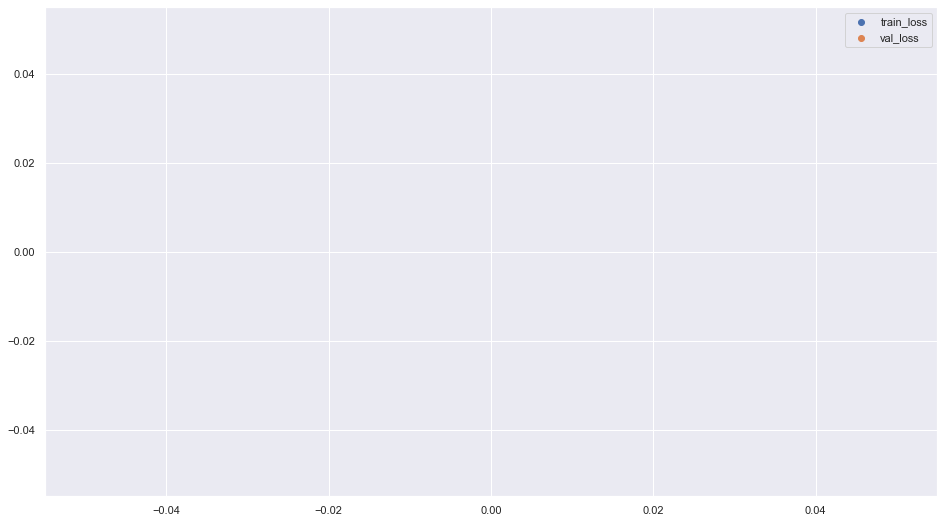

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(16,9))
plt.rcParams["font.size"] = 20 #rcParamsは辞書形式でパラメータを扱える
plt.scatter(range(len(slr.losses)),slr.losses,label='train_loss')
plt.scatter(range(len(slr.losses_val)),slr.losses_val,label='val_loss')
plt.legend()
plt.plot();

In [10]:
print(slr.losses[0])
print(slr.losses_val[0])

IndexError: index 0 is out of bounds for axis 0 with size 0